# Script to calculate histogram of annual load profiles selected for simulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter


In [3]:
green = '#28A197'  # self-consumption
blue = '#12436D'  # pool energy
red = '#801650'  # grid energy
orange = '#F46A25'
grey = '#3D3D3D'
purple = '#A285D1'

In [4]:
# Use glob to get all CSV files in the folder
csv_files = glob.glob("C:/Projects/community/simulation_study_run/data/2013/*.csv")

# Create an empty list to store all the annual loads
annual_loads = []

# Loop through all CSV files and calculate the annual load for each file
for file in csv_files:
    df = pd.read_csv(file, parse_dates=['DateTime'])
    annual_load = df['consumption'].sum()
    annual_loads.append(annual_load)



In [5]:
# Use glob to get all CSV files in the folder
csv_files = glob.glob("C:/Projects/community/simulation_study_run/data/2013_unfiltered_dataset/*.csv")

# Create an empty list to store all the annual loads
annual_loads_subset = []

# Loop through all CSV files and calculate the annual load for each file
for file in csv_files:
    df = pd.read_csv(file, parse_dates=['DateTime'])
    annual_load = df['consumption'].sum()
    annual_loads_subset.append(annual_load)



In [6]:
len(annual_loads_subset)


4071

In [7]:
#You can use a list comprehension to count the number of values in a list that are higher than a certain value. Here's an example:


# Define the threshold value
threshold = 10000

# Count the number of values higher than the threshold
count = 1- (len([x for x in annual_loads_subset if x > threshold]))/threshold

# Print the result
print("Number of values higher than", threshold, ":", count)

Number of values higher than 10000 : 0.9868


In [8]:
df = pd.DataFrame({'values': annual_loads})

# calculate median
median = df['values'].median()

# calculate mean 
mean = df['values'].mean()

# calculate standard deviation
standard = df['values'].std()

print("mean: ", mean)
print("meadian: ", median)
print("standard deviation: ", standard)

df2 = pd.DataFrame({'values': annual_loads_subset})

# calculate median
median = df2['values'].median()

# calculate mean 
mean = df2['values'].mean()

# calculate standard deviation
standard = df2['values'].std()

print("mean: ", mean)
print("median: ", median)
print("standard deviation: ", standard)

mean:  3416.4628963682694
meadian:  3007.50049985
standard deviation:  1917.5899088019312
mean:  3739.939315077622
median:  3071.8489999999997
standard deviation:  2718.496071720137


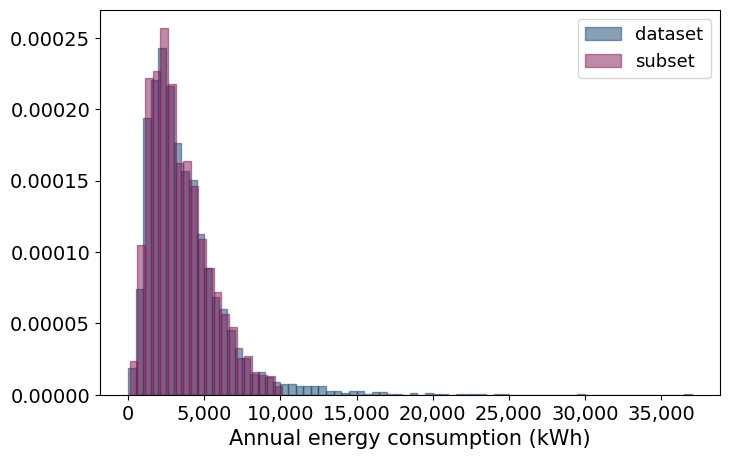

In [28]:
binwidth=500

fig, ax = plt.subplots(figsize=(8,5))
# Create a histogram of the annual loads for each file
plt.hist(annual_loads_subset, density=True,  bins=np.arange(min(annual_loads_subset), max(annual_loads_subset) + binwidth, binwidth), alpha=0.5, label='dataset', color = blue, ec=blue)
plt.hist(annual_loads, density=True,   bins=np.arange(min(annual_loads), max(annual_loads) + binwidth, binwidth), alpha=0.5, label='subset', color=red, ec=red)
plt.xlabel('Annual energy consumption (kWh)', fontsize=15)
plt.legend(fontsize=13)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

# Calculate quantiles to identify S, M, L for load profiles


In [10]:
np.quantile(annual_loads_subset, q = np.arange(0.25, 1, 0.25))


array([1983.1355002, 3071.849    , 4708.2605003])

In [11]:
np.quantile(annual_loads_subset, [0,0.25,0.5,0.75,1])


array([    0.       ,  1983.1355002,  3071.849    ,  4708.2605003,
       36990.1689997])